In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Creation of a patch level dataset

In this notebook we create a dataset of patches of images. The input should be a full image dataset.

The patches are randomly selected from a list of full images, using a variable stride, adding flexibility in the selection of the patches: the can or cannot overlap depending of the stride parameter.

The class that manages the creation of the patches is implemented in the package 'mm_patch'.

mm_patch.data.Patches saves the patches as png at the desired location.
mm_patch.data.PatchesPd stores the patches in pandas dataframe that remains loaded in RAM. It is useful for handling small datasets.

In [50]:
# import sklearn.feature_extraction.image as image
import imageio
import matplotlib.pyplot as plt
import numpy as np
import numbers
import os
import pandas as pd
import pickle


import mm_patch.data
from mm_patch.crop import *

In [222]:
# define crop object
trans_ls = [crop_img_from_largest_connected, crop_horizontal, crop_vertical]
crop_seq = Crop(trans_ls)

In [223]:
# mm_patch.data.Patches: build patches and save them as .png 
dense_patches = mm_patch.data.Patches('/scratch/fbarone/images_full_patches_CRO_23072019/dense', '/scratch/fbarone/patches_images/dense', crop_seq, patch_size = 256, stride = 50, max_patches = 100)
venous_patches = mm_patch.data.Patches('/scratch/fbarone/images_full_patches_CRO_23072019/venous', '/scratch/fbarone/patches_images/venous', crop_seq, patch_size = 256, stride = 50, max_patches = 100)

In [32]:
# mm_patch.data.PatchesPd: build patches and stores them as a pandas dataframe 
dense_patches = mm_patch.data.PatchesPd('../patches_images/full_images/dense', 'dense', crop_seq, patch_size = 224, stride = 50, max_patches = 100)
venous_patches = mm_patch.data.PatchesPd('../patches_images/full_images/venous', 'venous', crop_seq, patch_size = 224, stride = 50, max_patches = 100)

FileNotFoundError: [Errno 2] No such file or directory: '../patches_images/full_images/dense'

In [7]:
patches = pd.concat([dense_patches.data,venous_patches.data], ignore_index = True)
print(f'number of patches: {len(patches)}')
print(f'shape of single patch: {patches["patch"].iloc[0].shape}')
patches.head()


number of patches: 2800
shape of single patch: (224, 224)


,patch,label
0,"[[24454, 27638, 25958, 22709, 23189, 24038, 22...",dense
1,"[[33464, 31479, 31719, 33512, 31863, 28006, 29...",dense
2,"[[26998, 29879, 29927, 28358, 22117, 27718, 23...",dense
3,"[[33080, 29255, 33768, 33992, 32247, 36952, 35...",dense
4,"[[29479, 28791, 24038, 24646, 27670, 26854, 22...",dense


### Save Dataframe as pickle

In [8]:
# patches.to_pickle("./patches_224x224.pkl")

### Plot venous

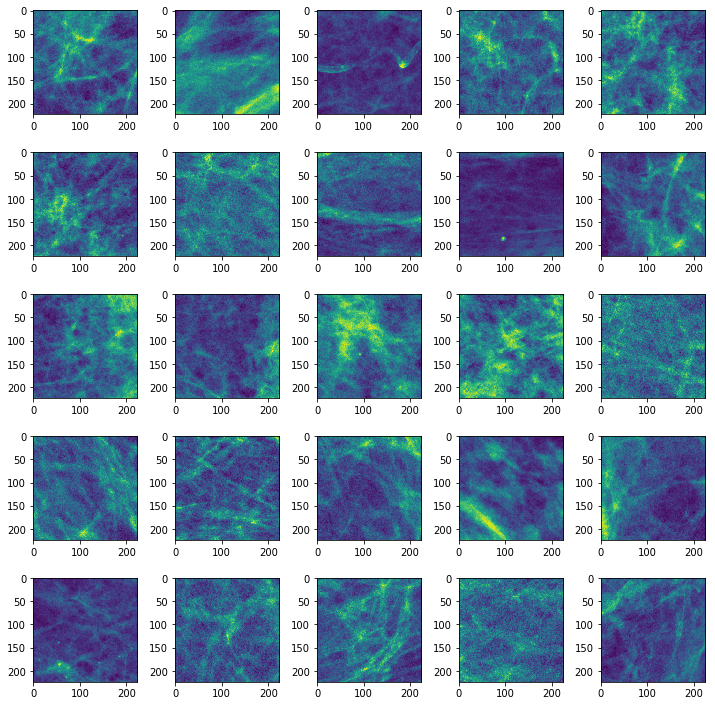

In [9]:
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5

sample = venous_patches.sample(rows*columns)

for i in range(1, columns*rows +1):
    img = sample.iloc[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[:,:])
    
plt.tight_layout()
plt.show()

### Plot dense

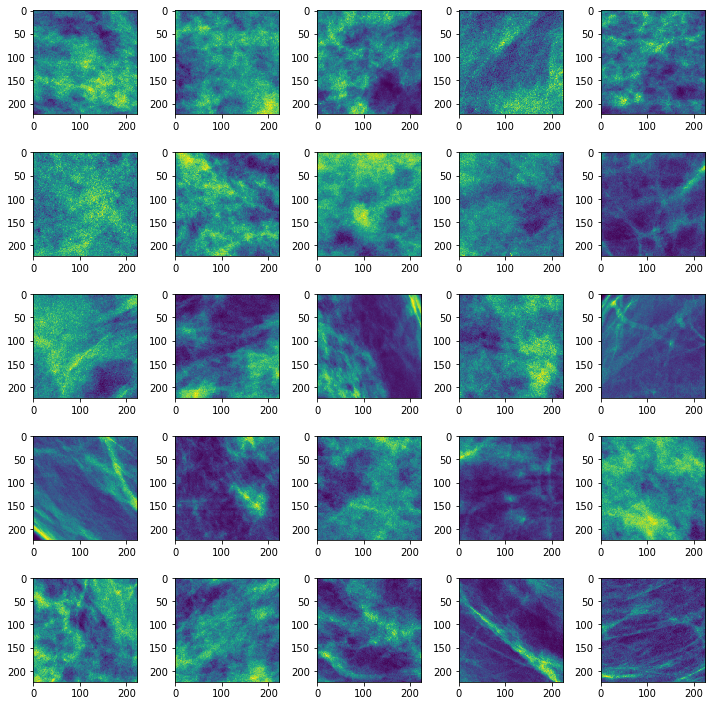

In [92]:
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5

sample = dense_patches.sample(rows*columns)

for i in range(1, columns*rows +1):
    img = sample.iloc[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[:,:])
    
plt.tight_layout()
plt.show()

### Extra: Test of extract_patches_2d

In [1]:
img = imageio.imread('/scratch/fbarone/patches_images/full_images/dense/117186_L_CC.png')
print(img.dtype)
# im = im[1000:,:]
print(img.shape)
np.argmax(img)

NameError: name 'imageio' is not defined

In [172]:
zero = np.zeros((50,50), dtype = np.int32)
one = np.ones((50,50), dtype = np.int32)
arr = np.block([[zero,one,zero,2*one],[3*one,zero,4*one,zero],[zero,5*one,zero,6*one],[7*one,zero,8*one,zero]])

In [ ]:
mm_patch.extract_bis.extract_patches_2d?

(12, 50, 50)


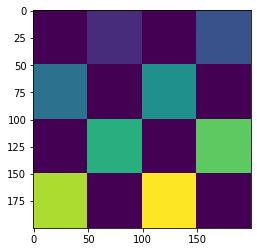

In [210]:
plt.imshow(arr, vmin=0, vmax=8)
# plt.show()
# img = crop_img_from_largest_connected(img)
# plt.imshow(img)
# plt.show()

patches_arr = mm_patch.extract_bis.extract_patches_2d(arr, (50, 50), 12, (9,9,1), None) 
print(patches_arr.shape)

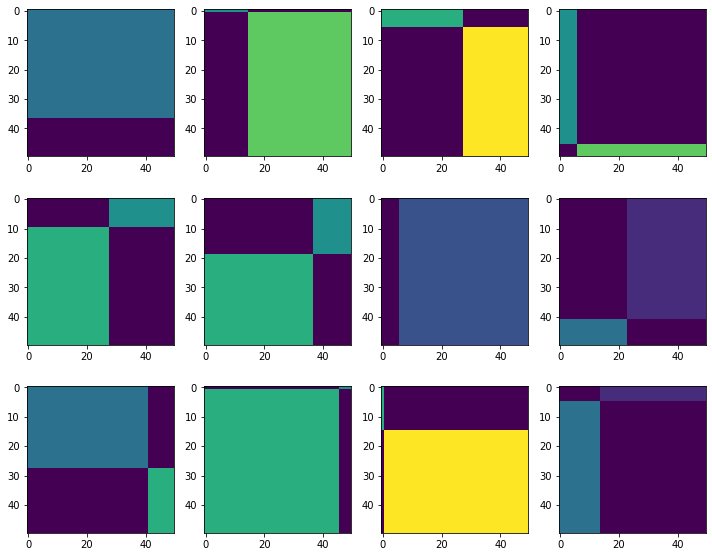

In [211]:
fig=plt.figure(figsize=(10, 8))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    img = patches_arr[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, vmin=0, vmax=8)
plt.tight_layout()
plt.show()

### Extract patch from single image

In [77]:
import mm_patch.extract_bis as extr



In [78]:
candidates_ls = ['80907_L_CC', '97800_L_CC', '116588_L_CC', '117186_L_CC', '118343_L_CC', '121445_L_CC', '122118_L_CC', '122141_L_CC', '122876_L_CC', '132796_L_CC' ]
len(candidates_ls)

10

In [79]:
img = imageio.imread('/scratch/fbarone/dicom_CRO_23072019/sample_data/images/80907_L_CC.png')

print(img.dtype)
# im = im[1000:,:]
print(img.shape)
np.argmax(img)


uint16
(3328, 2560)


974429

In [80]:
# mm_patch.extract_bis.extract_patches_2d?

In [146]:
indexes, patches = extr.extract_patches_2d(img, (256,256), max_patches=40, stride=50, 
                                           patch_filter=extr.patch_filter, random_state=None)
len(patches)

img.shape

# img_patches = np.zeros(img.shape)
img_patches = np.copy(img)


for k,index in enumerate(indexes):
    i_p, j_p = index
    print(i_p,j_p)
    i_p *= 50
    j_p *= 50
    print(i_p,j_p)
#     print(k)
#     print(patches[k])
    img_patches[i_p:i_p+256, j_p:j_p+256] = patches[k]+10000

23 14
1150 700
29 1
1450 50
13 4
650 200
33 18
1650 900
46 1
2300 50
8 2
400 100
36 8
1800 400
35 19
1750 950
11 4
550 200
15 2
750 100
48 12
2400 600
24 0
1200 0
15 3
750 150
21 9
1050 450
45 8
2250 400
34 6
1700 300
28 22
1400 1100
26 1
1300 50
54 2
2700 100
51 4
2550 200
34 24
1700 1200
18 4
900 200
47 4
2350 200
16 13
800 650
28 17
1400 850
45 11
2250 550
33 7
1650 350
30 0
1500 0
38 3
1900 150
37 13
1850 650
41 1
2050 50
37 4
1850 200
14 5
700 250
23 2
1150 100
46 17
2300 850
39 20
1950 1000
37 8
1850 400
12 0
600 0
41 21
2050 1050
24 14
1200 700


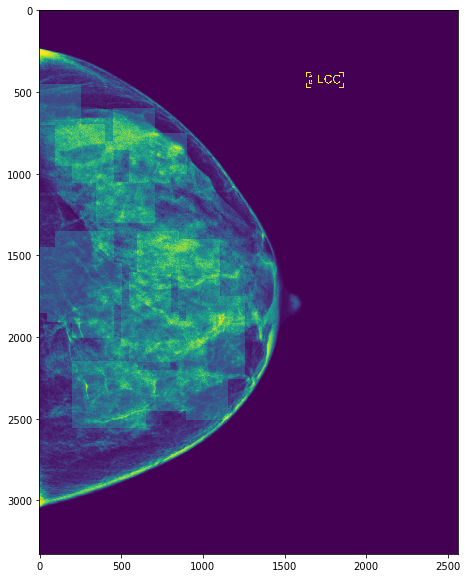

In [139]:
# plt.imshow(img)
fig = plt.figure(figsize=(20,10))
plt.imshow(img_patches)
plt.show()

In [147]:
test = np.array([1,23,5,6,7])

In [155]:
test.dtype == 'float'

False